In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")

In [3]:
dataframe.head()

,time,latitude,longitude,altitude,timelocal,temperature,pressure,humidity,voc,noise,co2,ch2o,o3,pm1,pm25,pm10,readable time,day
0,1651363204,45.651464,25.615426,538,914160,6.73,95569,76,215841,43,599,7,20,7,9,10,01-05-22 00:00,01-05-22
1,1651363264,45.651464,25.615426,538,914220,6.71,95569,76,213691,50,601,7,20,7,9,10,01-05-22 00:01,01-05-22
2,1651363324,45.651464,25.615426,538,914280,6.70,95570,76,211822,43,601,7,20,7,9,10,01-05-22 00:02,01-05-22
3,1651363384,45.651464,25.615426,538,914340,6.69,95568,76,206437,42,600,7,20,7,9,10,01-05-22 00:03,01-05-22
4,1651363444,45.651464,25.615426,538,914400,6.67,95568,77,206428,45,602,7,20,7,9,10,01-05-22 00:04,01-05-22


In [4]:
dataframe_size = len(dataframe.index)
dataframe_size

44516

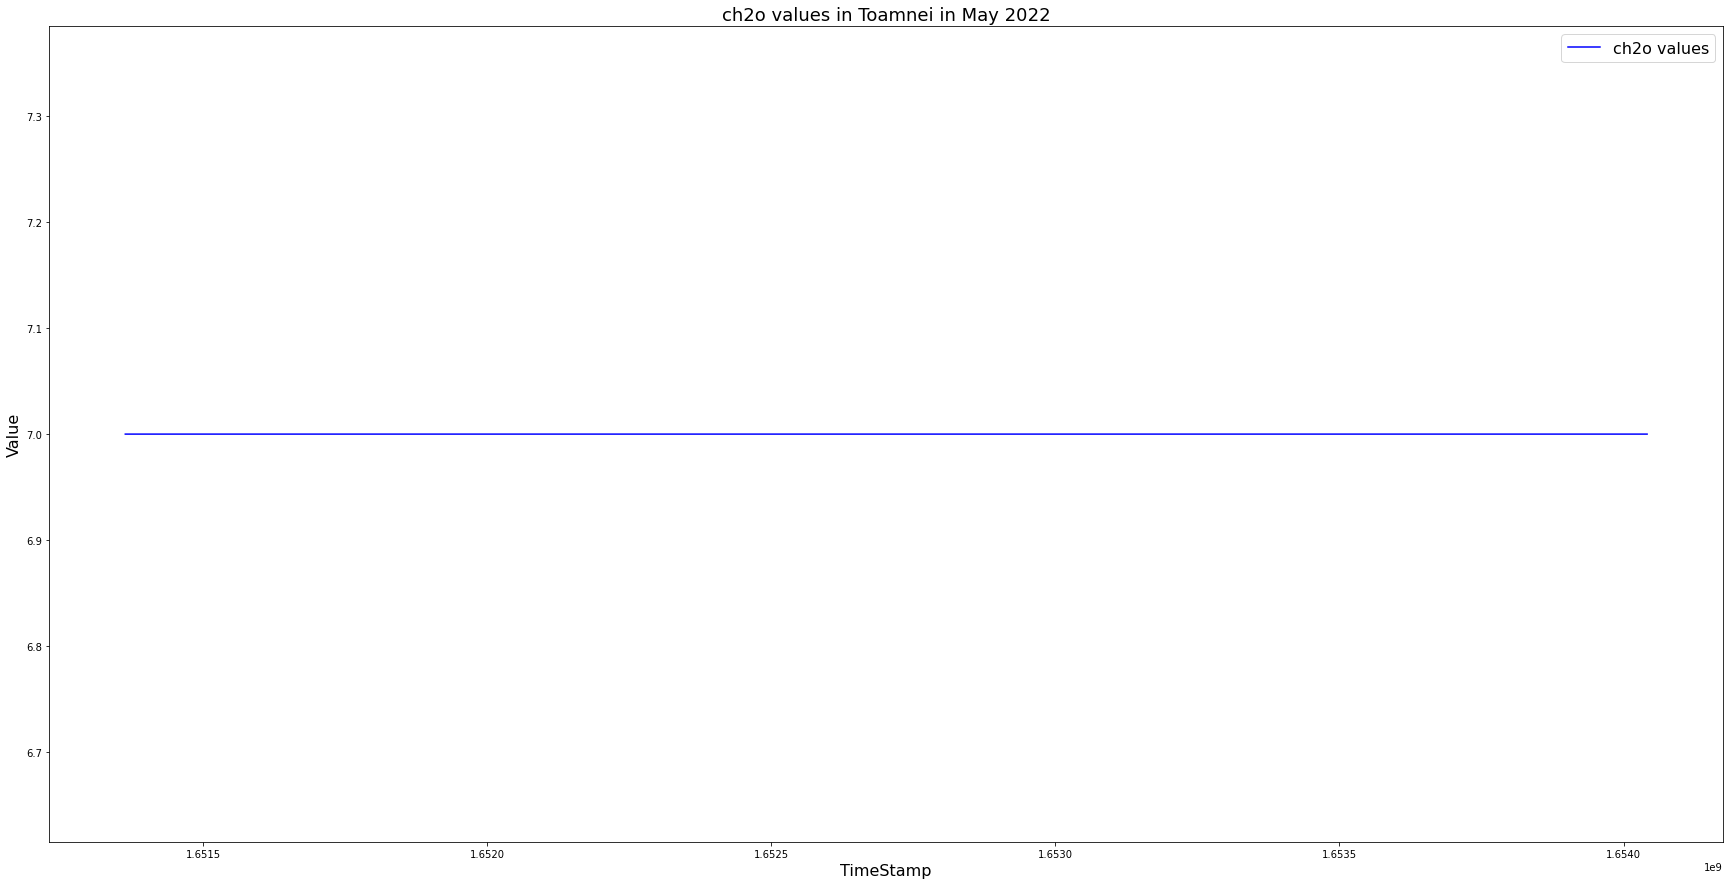

In [5]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(dataframe.get('time'), dataframe.get('ch2o'), label="ch2o values", color = "blue")
plt.xlabel("TimeStamp", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("ch2o values in Toamnei in May 2022", fontsize=18)
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05.jpg', bbox_inches = 'tight')
plt.show()

c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


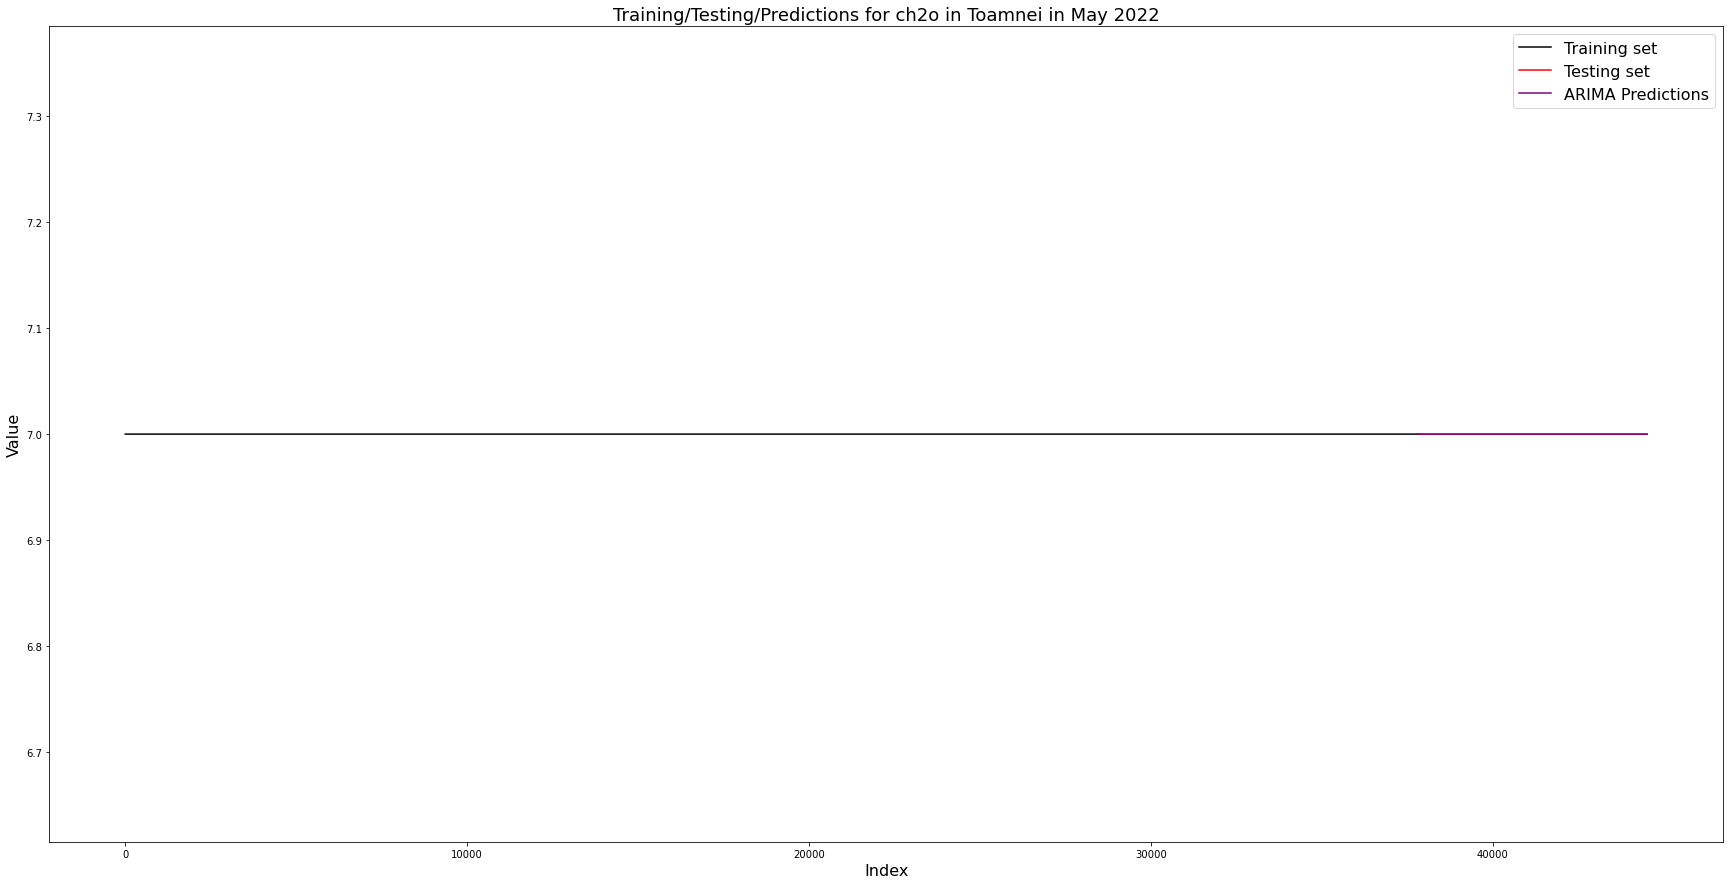

RMSE:  0.0


In [6]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]


from statsmodels.tsa.arima.model import ARIMA
y = train['ch2o']
ARMAmodel = ARIMA(y, order=(31,1,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

In [7]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]


from statsmodels.tsa.arima.model import ARIMA
y = train['ch2o']
ARMAmodel = ARIMA(y, order=(31,2,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions2')
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA2.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MemoryError: Unable to allocate 314. MiB for an array with shape (37839, 33, 33) and data type float64

c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


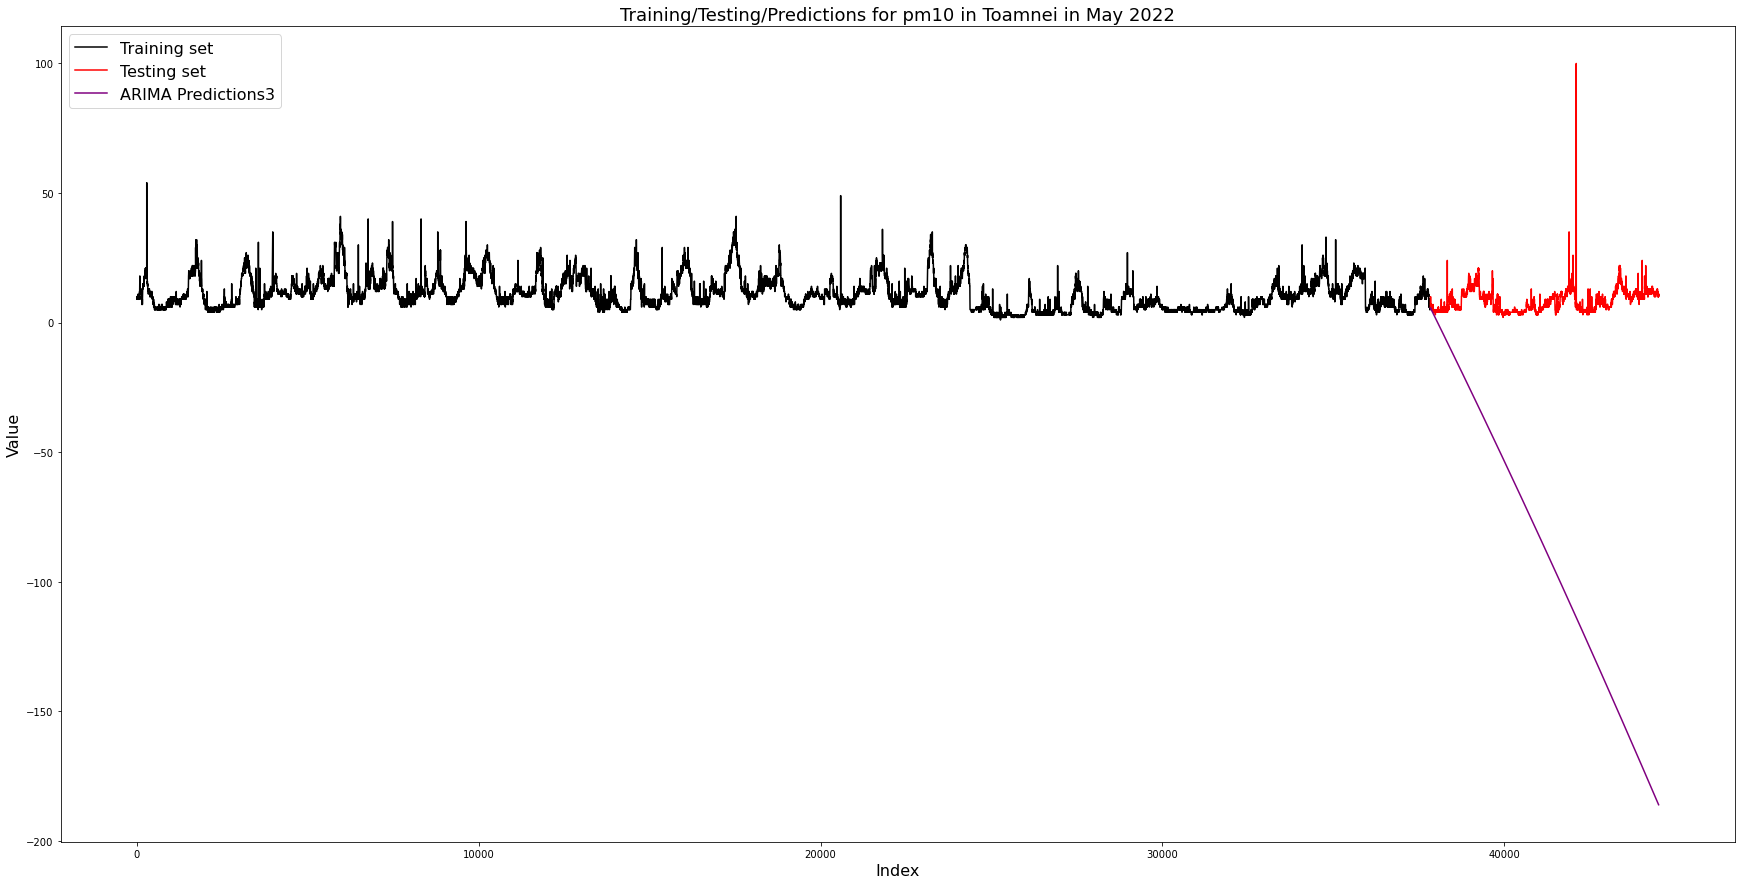

RMSE:  111.58965806895448


In [ ]:
# train = dataframe[dataframe.index < dataframe_size*(85/100)]
# test = dataframe[dataframe.index >= dataframe_size*(85/100)]


# from statsmodels.tsa.arima.model import ARIMA
# y = train['ch2o']
# ARMAmodel = ARIMA(y, order=(31,3,1))
# ARMAmodel = ARMAmodel.fit()
# y_pred = ARMAmodel.get_forecast(len(test.index))
# y_pred_df = y_pred.conf_int(alpha=0.05)
# y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test.index
# y_pred_out = y_pred_df["Predictions"]


# import matplotlib.pyplot as plt
# plt.close("all")
# plt.figure(figsize=(30,15))
# plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
# plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
# plt.xlabel("Index", fontsize=16)
# plt.ylabel("Value", fontsize=16)
# plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
# plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions3')
# plt.legend(fontsize=16)
# plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA3.jpg', bbox_inches = 'tight')
# plt.show()


# import numpy as np
# from sklearn.metrics import mean_squared_error
# arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
# print("RMSE: ", arima_rmse)

c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


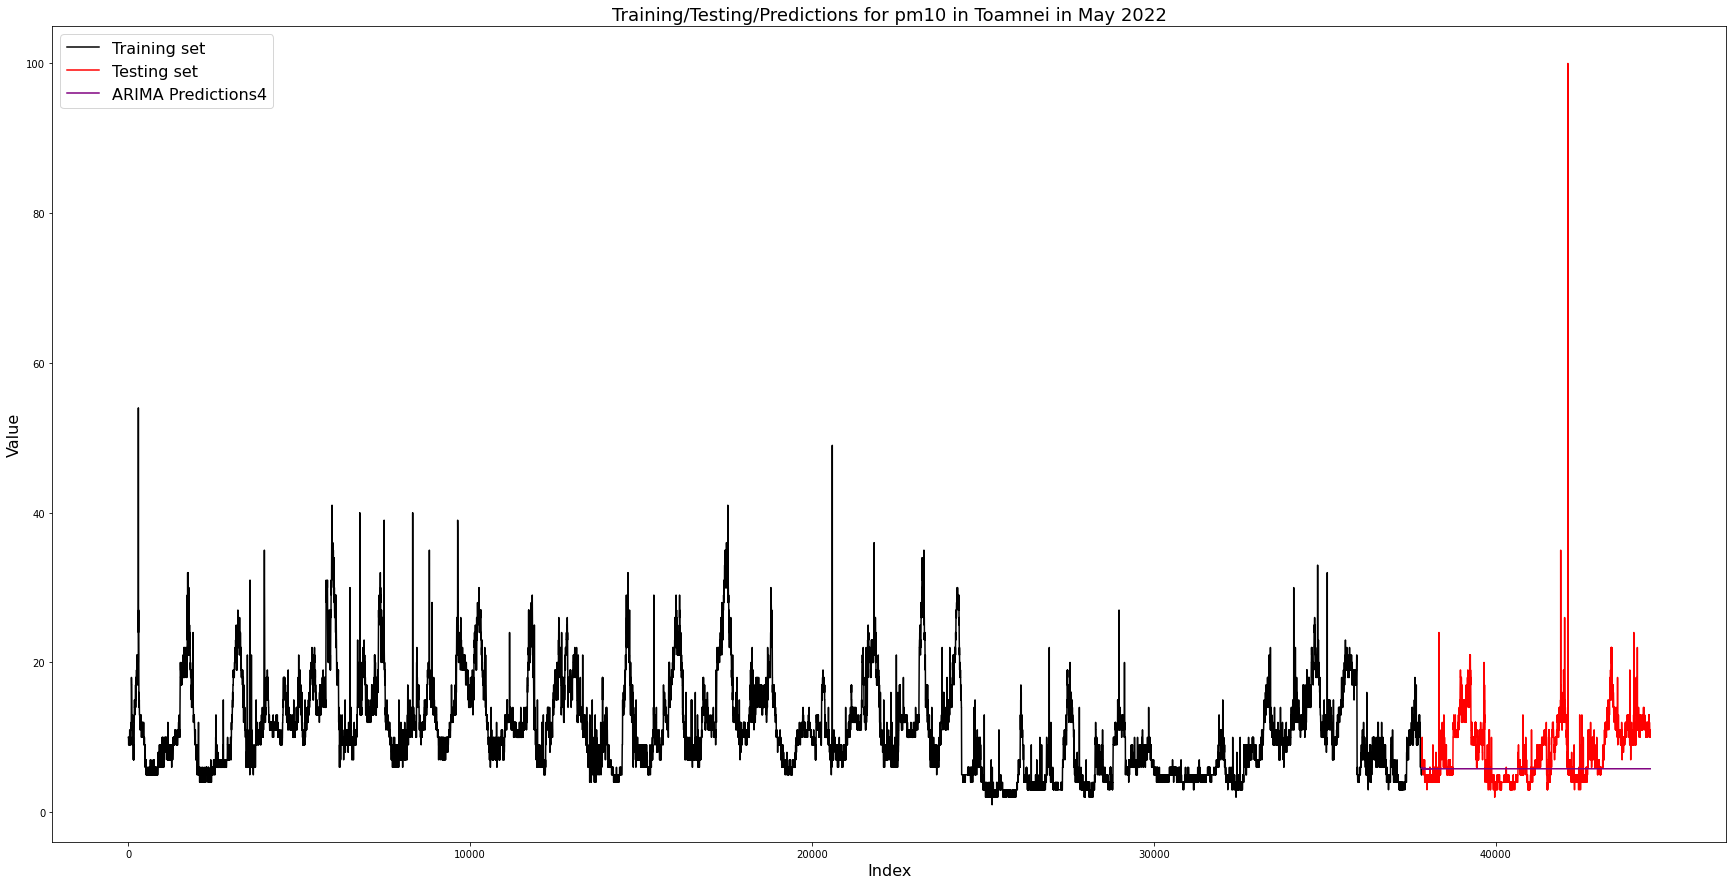

RMSE:  4.635330889329186


In [ ]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]


from statsmodels.tsa.arima.model import ARIMA
y = train['ch2o']
ARMAmodel = ARIMA(y, order=(31,1,31))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions4')
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA4.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


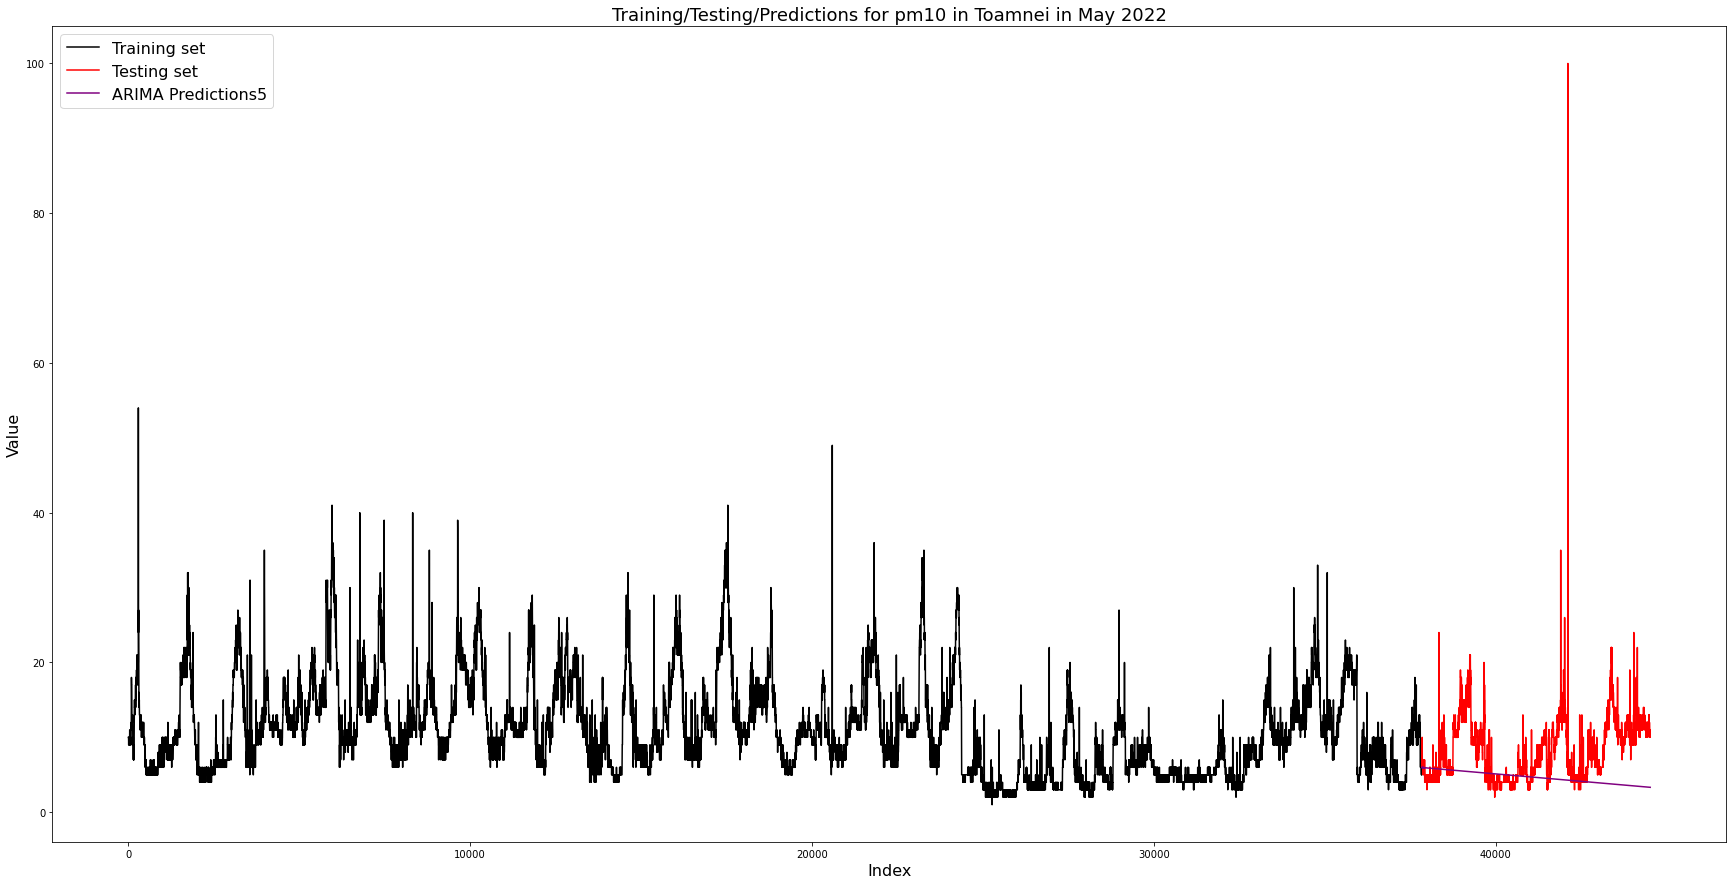

RMSE:  5.536204023016612


In [ ]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]


from statsmodels.tsa.arima.model import ARIMA
y = train['ch2o']
ARMAmodel = ARIMA(y, order=(31,2,31))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions5')
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA5.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


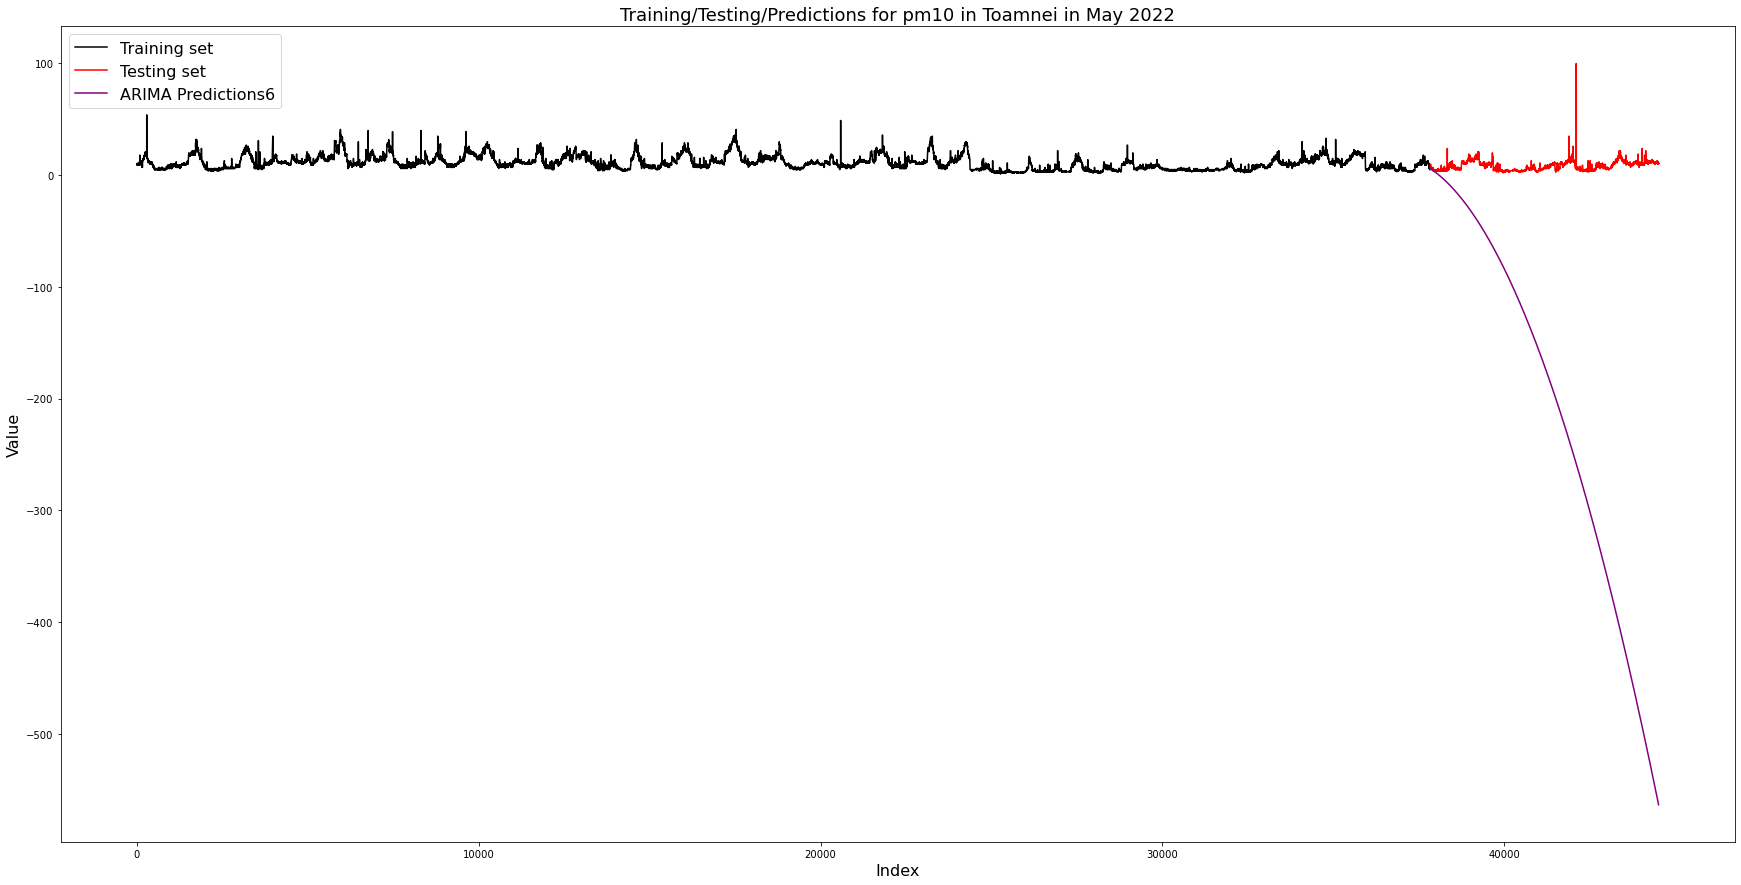

RMSE:  273.2722412340903


In [ ]:
# train = dataframe[dataframe.index < dataframe_size*(85/100)]
# test = dataframe[dataframe.index >= dataframe_size*(85/100)]


# from statsmodels.tsa.arima.model import ARIMA
# y = train['ch2o']
# ARMAmodel = ARIMA(y, order=(31,3,31))
# ARMAmodel = ARMAmodel.fit()
# y_pred = ARMAmodel.get_forecast(len(test.index))
# y_pred_df = y_pred.conf_int(alpha=0.05)
# y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test.index
# y_pred_out = y_pred_df["Predictions"]


# import matplotlib.pyplot as plt
# plt.close("all")
# plt.figure(figsize=(30,15))
# plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
# plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
# plt.xlabel("Index", fontsize=16)
# plt.ylabel("Value", fontsize=16)
# plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
# plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions6')
# plt.legend(fontsize=16)
# plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA6.jpg', bbox_inches = 'tight')
# plt.show()


# import numpy as np
# from sklearn.metrics import mean_squared_error
# arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
# print("RMSE: ", arima_rmse)

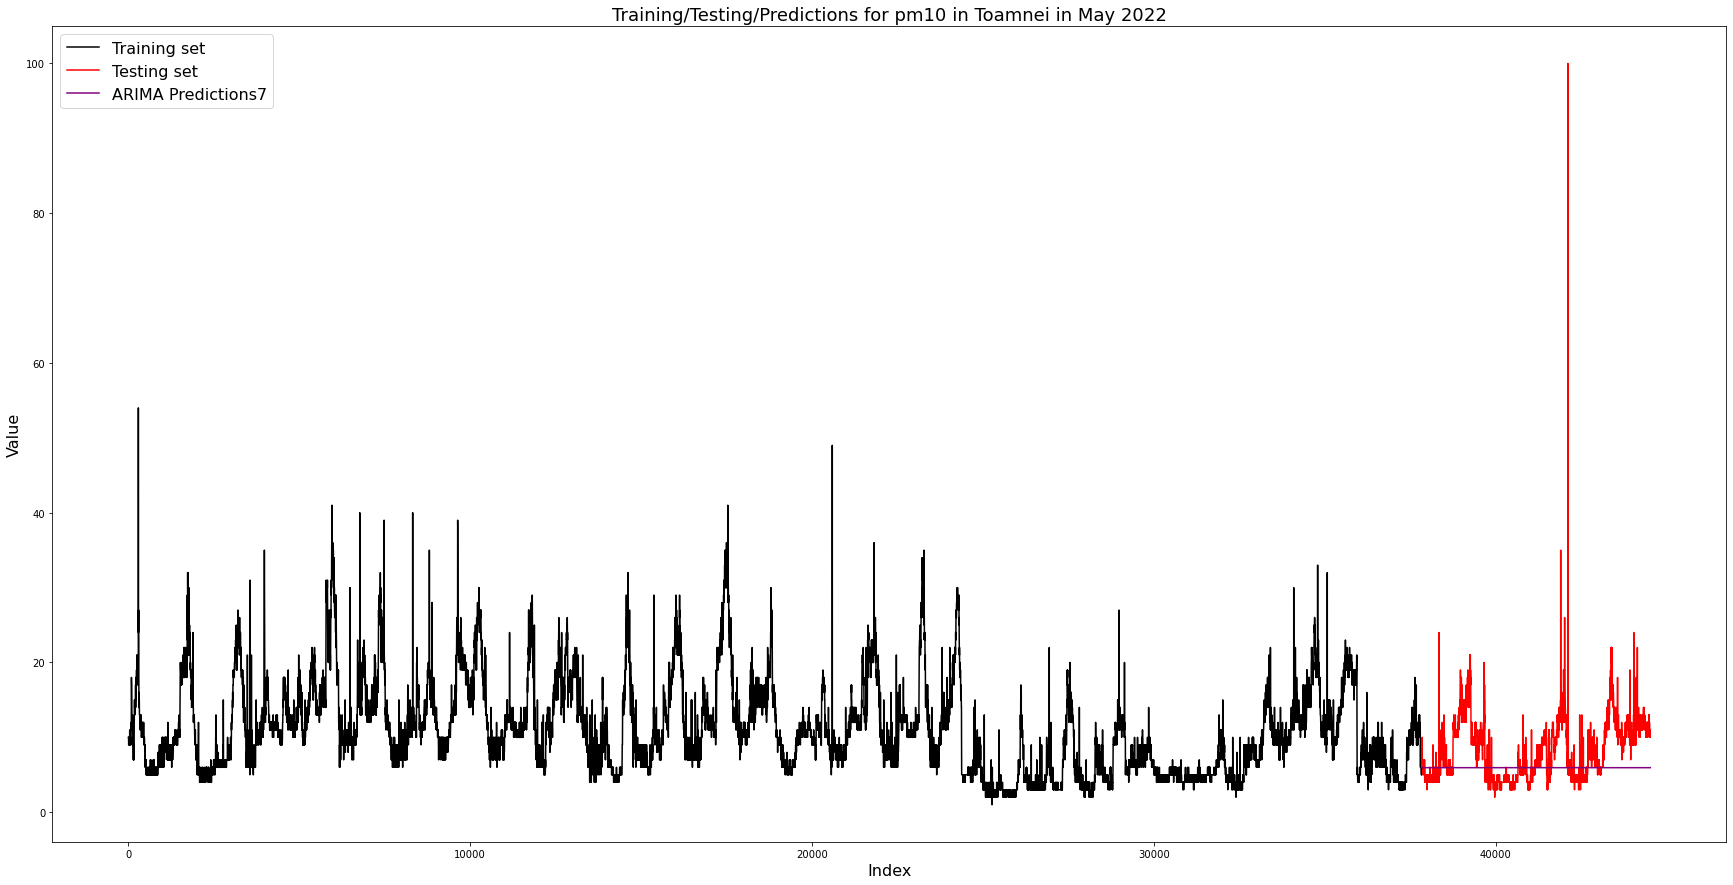

RMSE:  4.561011474939041


In [ ]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]


from statsmodels.tsa.arima.model import ARIMA
y = train['ch2o']
ARMAmodel = ARIMA(y, order=(1,1,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions7')
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA7.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

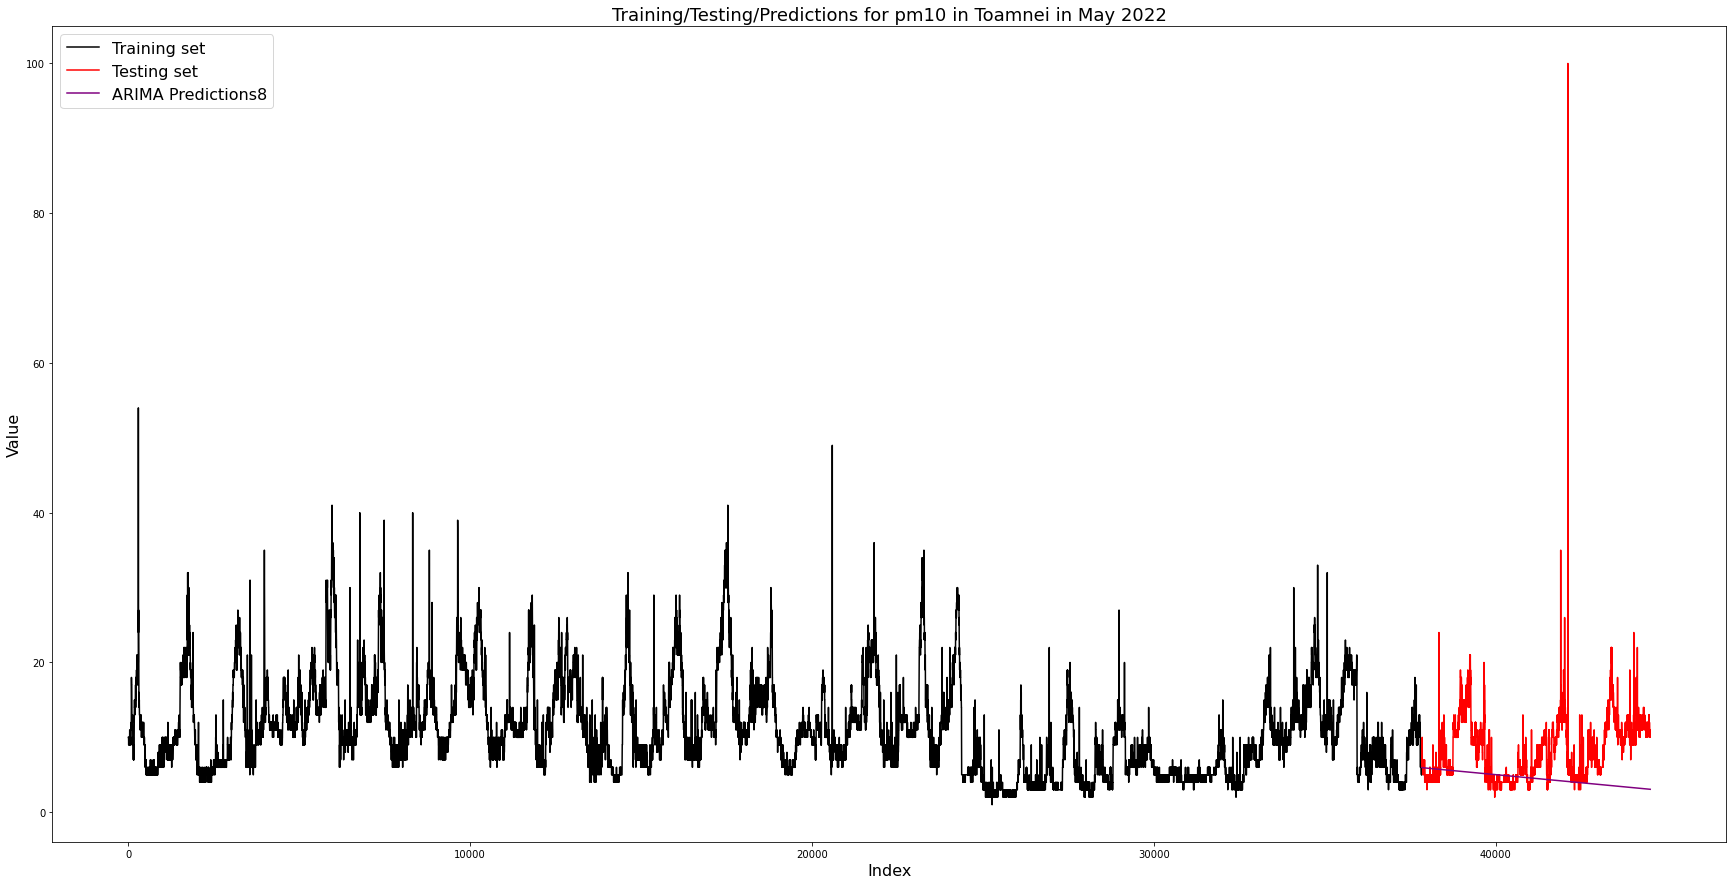

RMSE:  5.65297846653241


In [ ]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]


from statsmodels.tsa.arima.model import ARIMA
y = train['ch2o']
ARMAmodel = ARIMA(y, order=(2,2,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions8')
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA8.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


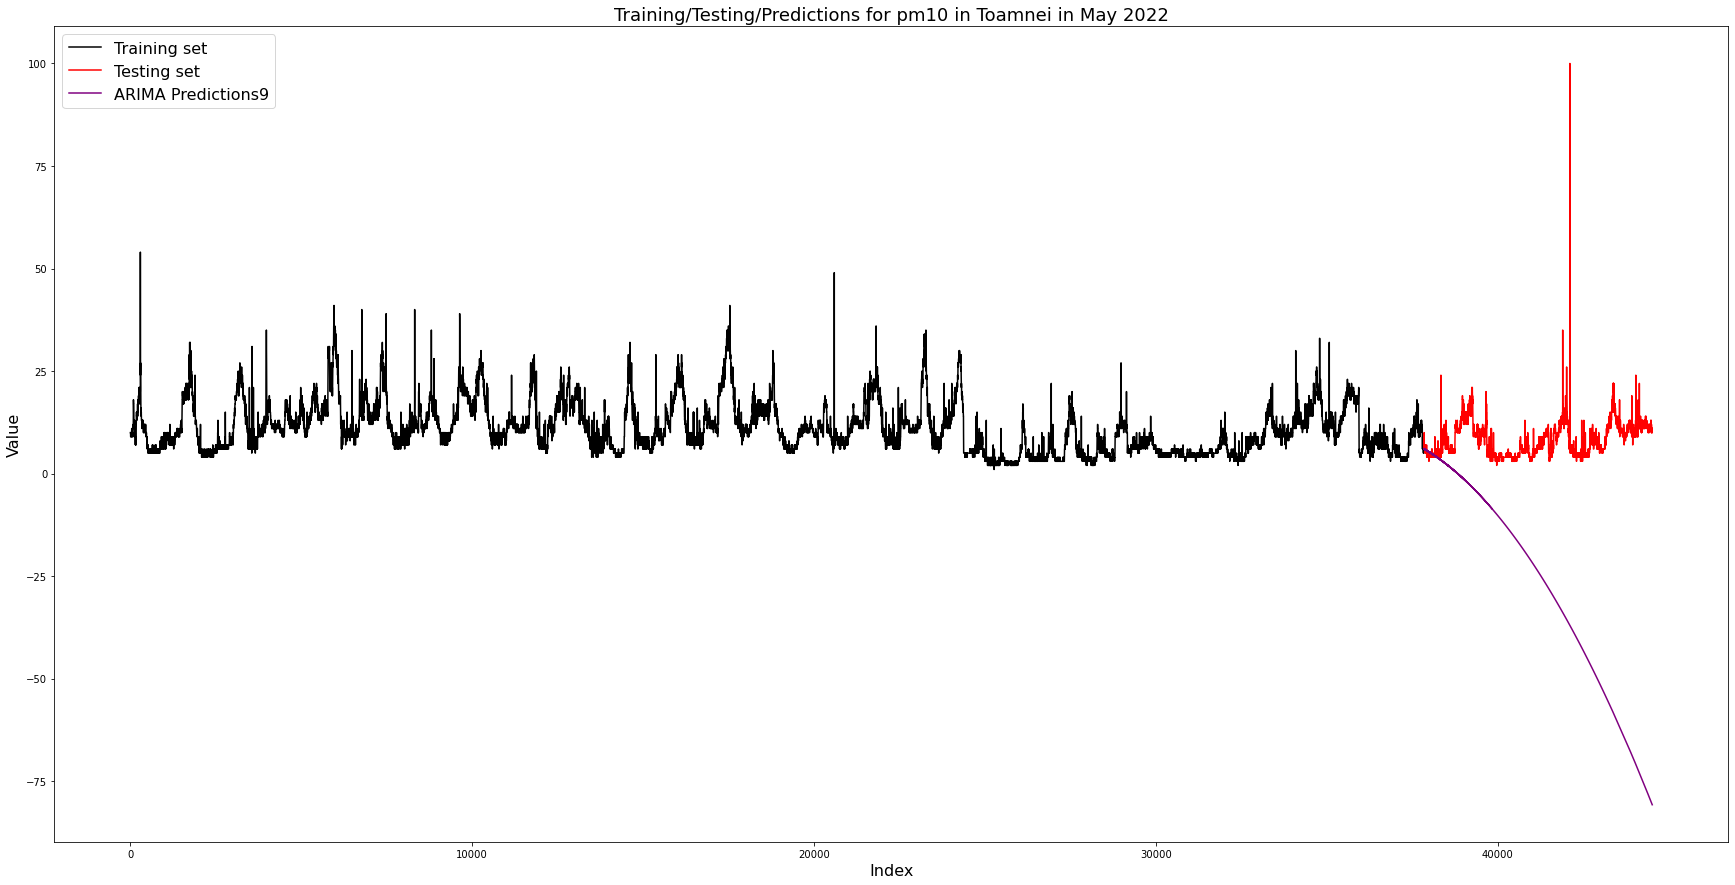

RMSE:  45.39383522101536


In [ ]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]


from statsmodels.tsa.arima.model import ARIMA
y = train['ch2o']
ARMAmodel = ARIMA(y, order=(3,3,3))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions9')
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA9.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\VALI\Programs\Miniconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


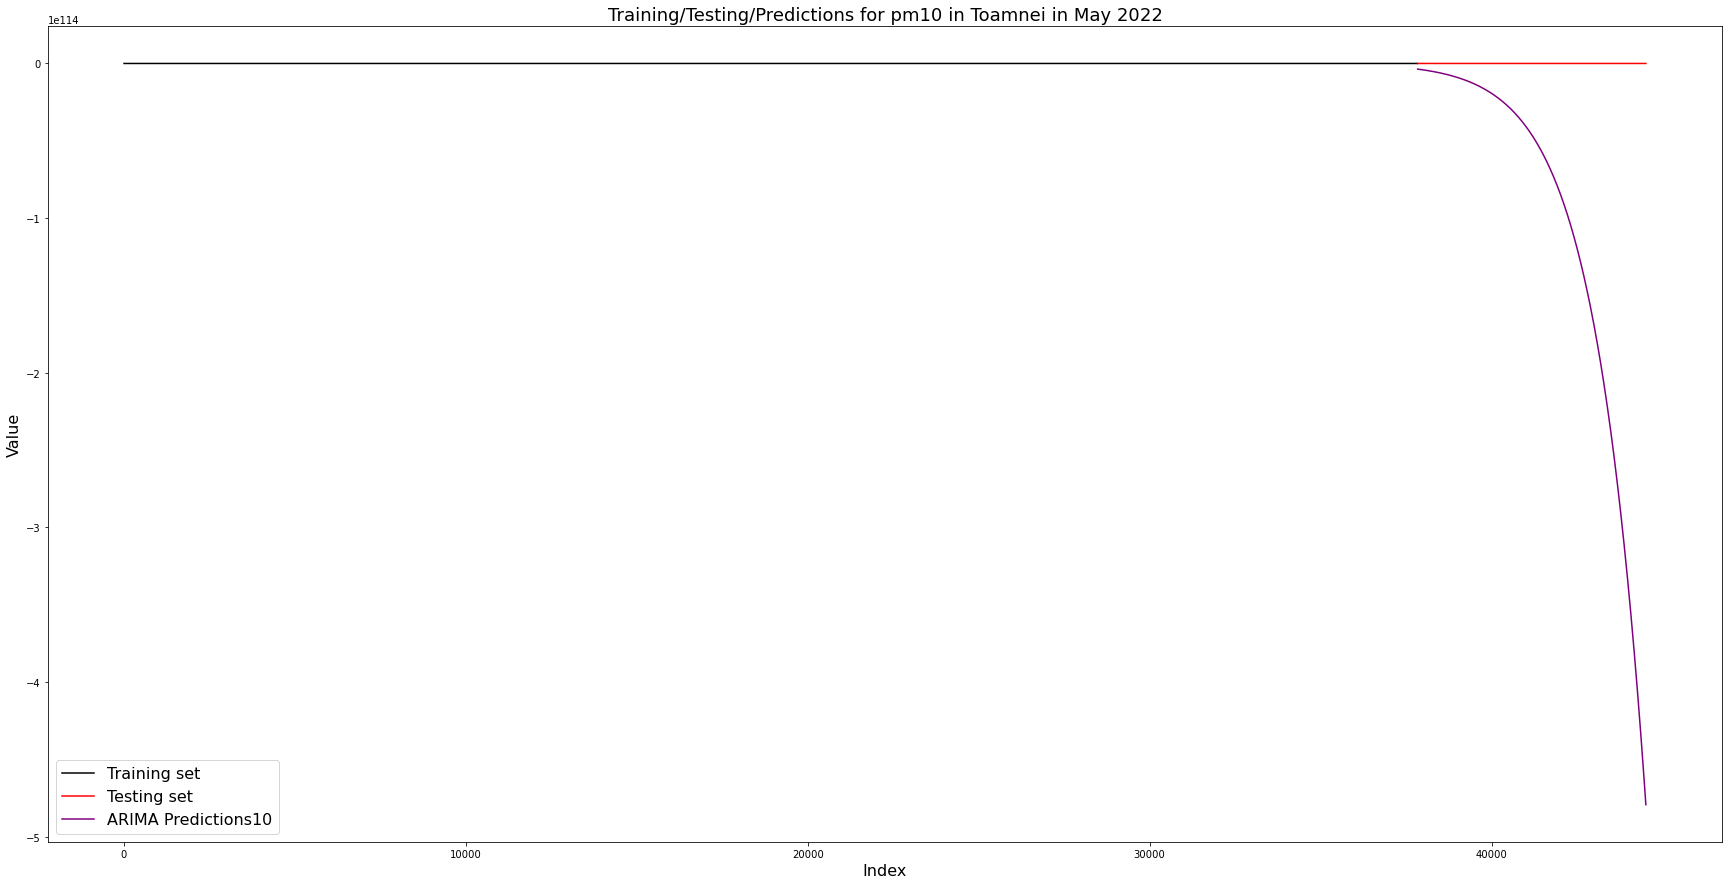

RMSE:  1.5841909085034373e+114


In [ ]:
# train = dataframe[dataframe.index < dataframe_size*(85/100)]
# test = dataframe[dataframe.index >= dataframe_size*(85/100)]


# from statsmodels.tsa.arima.model import ARIMA
# y = train['ch2o']
# ARMAmodel = ARIMA(y, order=(31,31,31))
# ARMAmodel = ARMAmodel.fit()
# y_pred = ARMAmodel.get_forecast(len(test.index))
# y_pred_df = y_pred.conf_int(alpha=0.05)
# y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test.index
# y_pred_out = y_pred_df["Predictions"]


# import matplotlib.pyplot as plt
# plt.close("all")
# plt.figure(figsize=(30,15))
# plt.plot(train.index, train.get('ch2o'), color = "black", label = "Training set")
# plt.plot(test.index, test.get('ch2o'), color = "red", label = "Testing set")
# plt.xlabel("Index", fontsize=16)
# plt.ylabel("Value", fontsize=16)
# plt.title("Training/Testing/Predictions for ch2o in Toamnei in May 2022", fontsize=18)
# plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions10')
# plt.legend(fontsize=16)
# plt.savefig('simulations/CSV_ch2o_2022-05_ARIMA10.jpg', bbox_inches = 'tight')
# plt.show()


# import numpy as np
# from sklearn.metrics import mean_squared_error
# arima_rmse = np.sqrt(mean_squared_error(test["ch2o"].values, y_pred_df["Predictions"]))
# print("RMSE: ", arima_rmse)

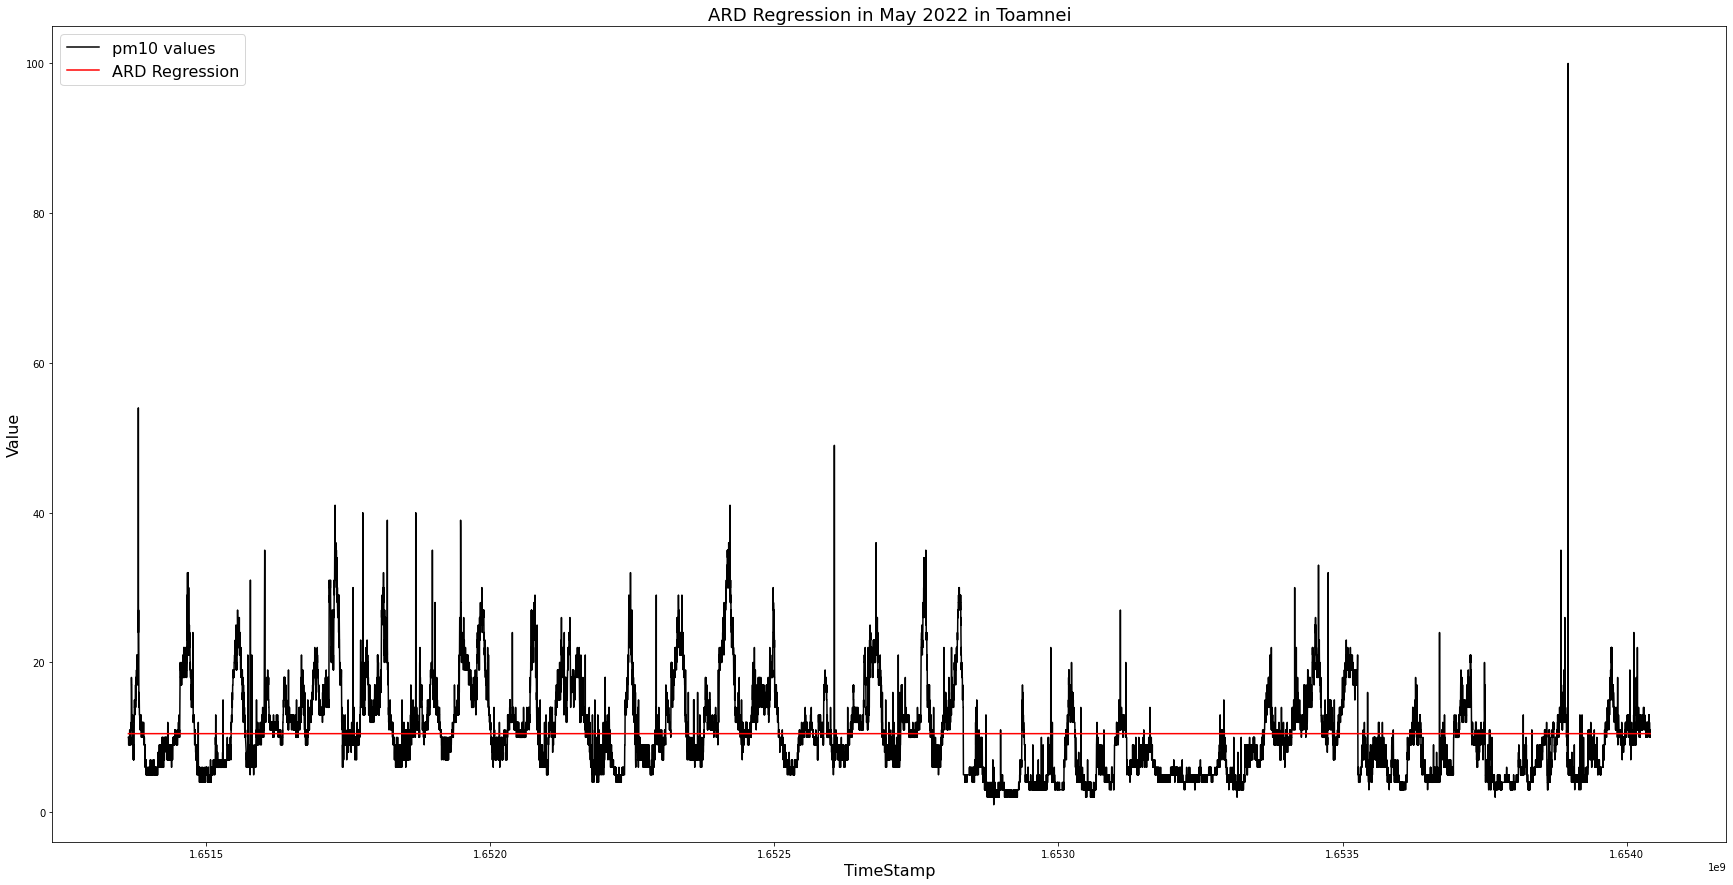

RMSE:  5.767762509838156


In [ ]:
dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")
X = dataframe[["time"]].values
Y = dataframe[["ch2o"]].values
i=0
x=[]
y=[]
for el in X:
    x.append(i)
    y.append(Y[i][0])
    i=i+1


from sklearn.linear_model import ARDRegression
clf = ARDRegression(compute_score=True)
clf.fit(X, y)
y_pred = clf.predict(X)


plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(X, y, color = 'black', label="ch2o values")
plt.plot(X, y_pred, color = 'red', label = 'ARD Regression')
plt.title('ARD Regression in May 2022 in Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_ARD.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE: ", rmse)

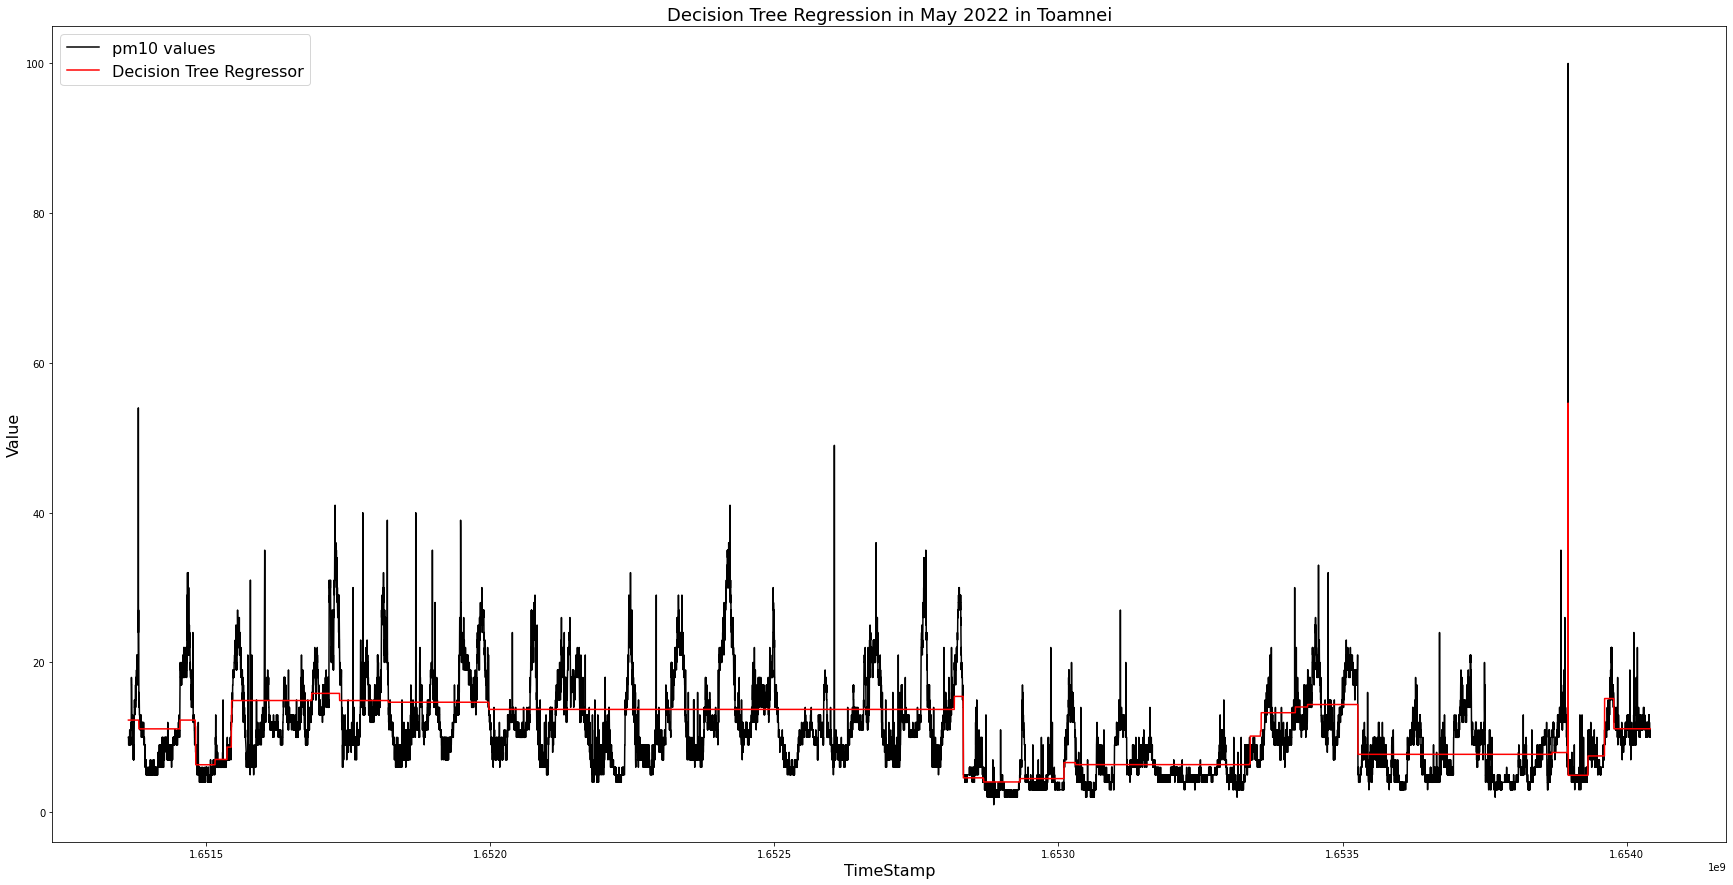

RMSE:  4.57092956036075


In [ ]:
dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")
X = dataframe[["time"]].values
Y = dataframe[["ch2o"]].values
i=0
x=[]
y=[]
for el in X:
    x.append(i)
    y.append(Y[i][0])
    i=i+1


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
rng = np.random.RandomState(1)
clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)
clf.fit(X, y)
y_pred = clf.predict(X)


plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(X, y, color='black', label="ch2o values")
plt.plot(X, y_pred, color='red', label='Decision Tree Regressor')
plt.title('Decision Tree Regression in May 2022 in Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_DecisionTree.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE: ", rmse)

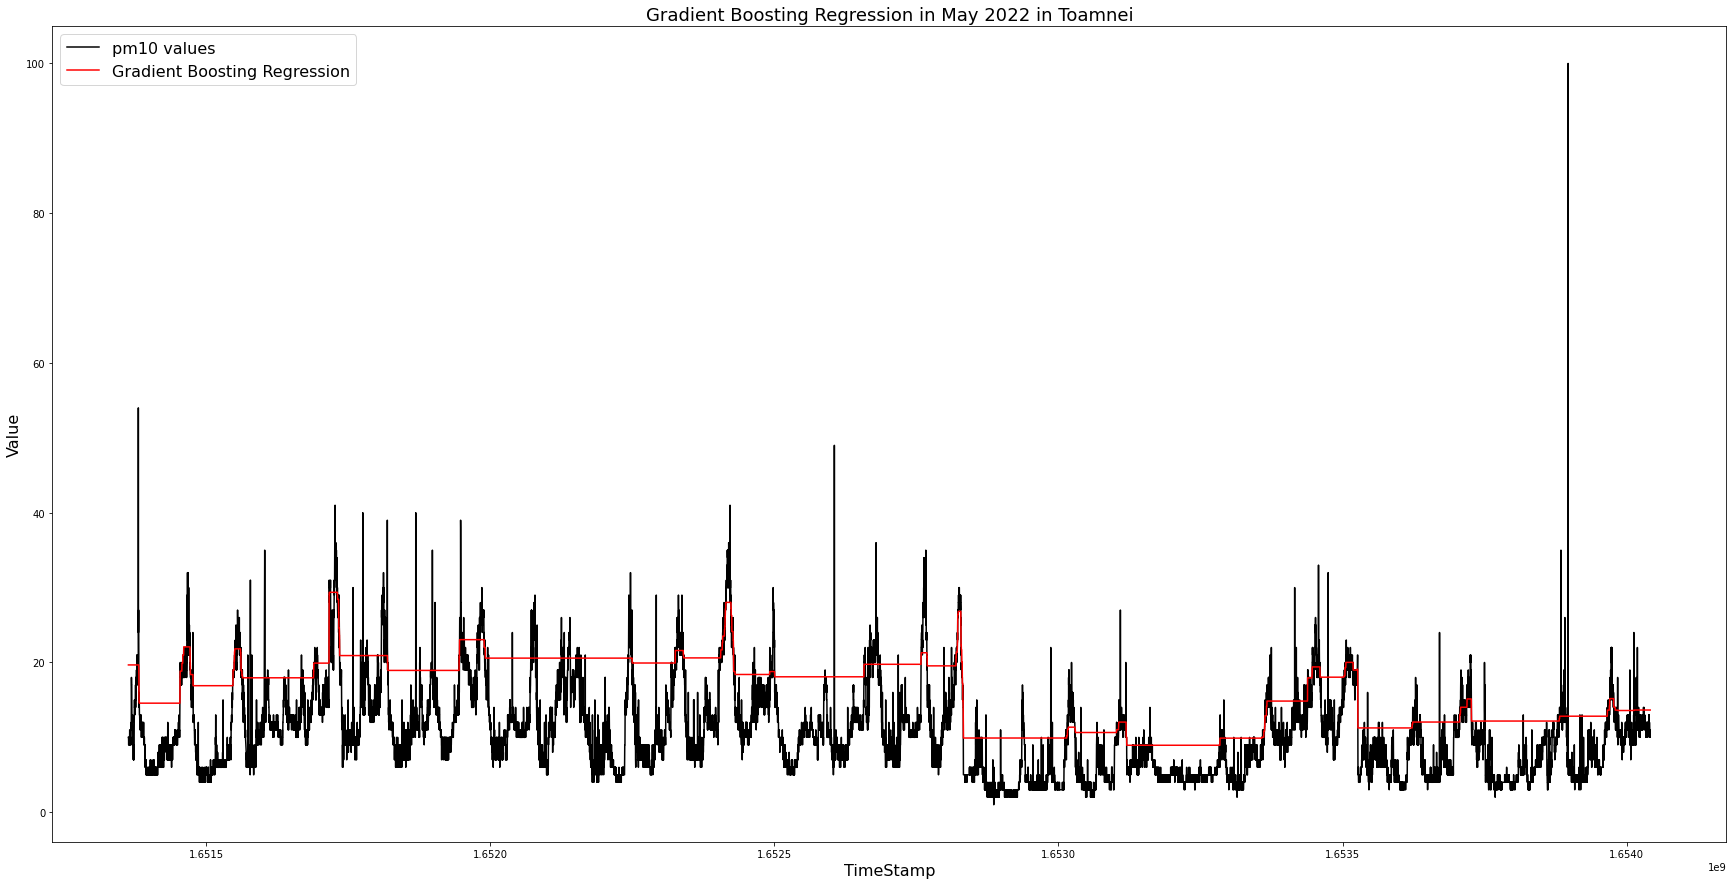

RMSE:  7.058167374527875


In [ ]:
dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")
X = dataframe[["time"]].values
Y = dataframe[["ch2o"]].values
i=0
x=[]
y=[]
for el in X:
    x.append(i)
    y.append(Y[i][0])
    i=i+1


from sklearn.ensemble import GradientBoostingRegressor
all_models = {}
common_params = dict(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=2,
    min_samples_leaf=9,
    min_samples_split=9,
)
for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    all_models["q %1.2f" % alpha] = gbr.fit(X, y)
clf = GradientBoostingRegressor(loss="quantile", **common_params)
clf.fit(X, y)
y_pred = clf.predict(X)


plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(X, y, color='black', label="ch2o values")
plt.plot(X, y_pred, color='red', label='Gradient Boosting Regression')
plt.title('Gradient Boosting Regression in May 2022 in Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_GradientBoosting.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE: ", rmse)

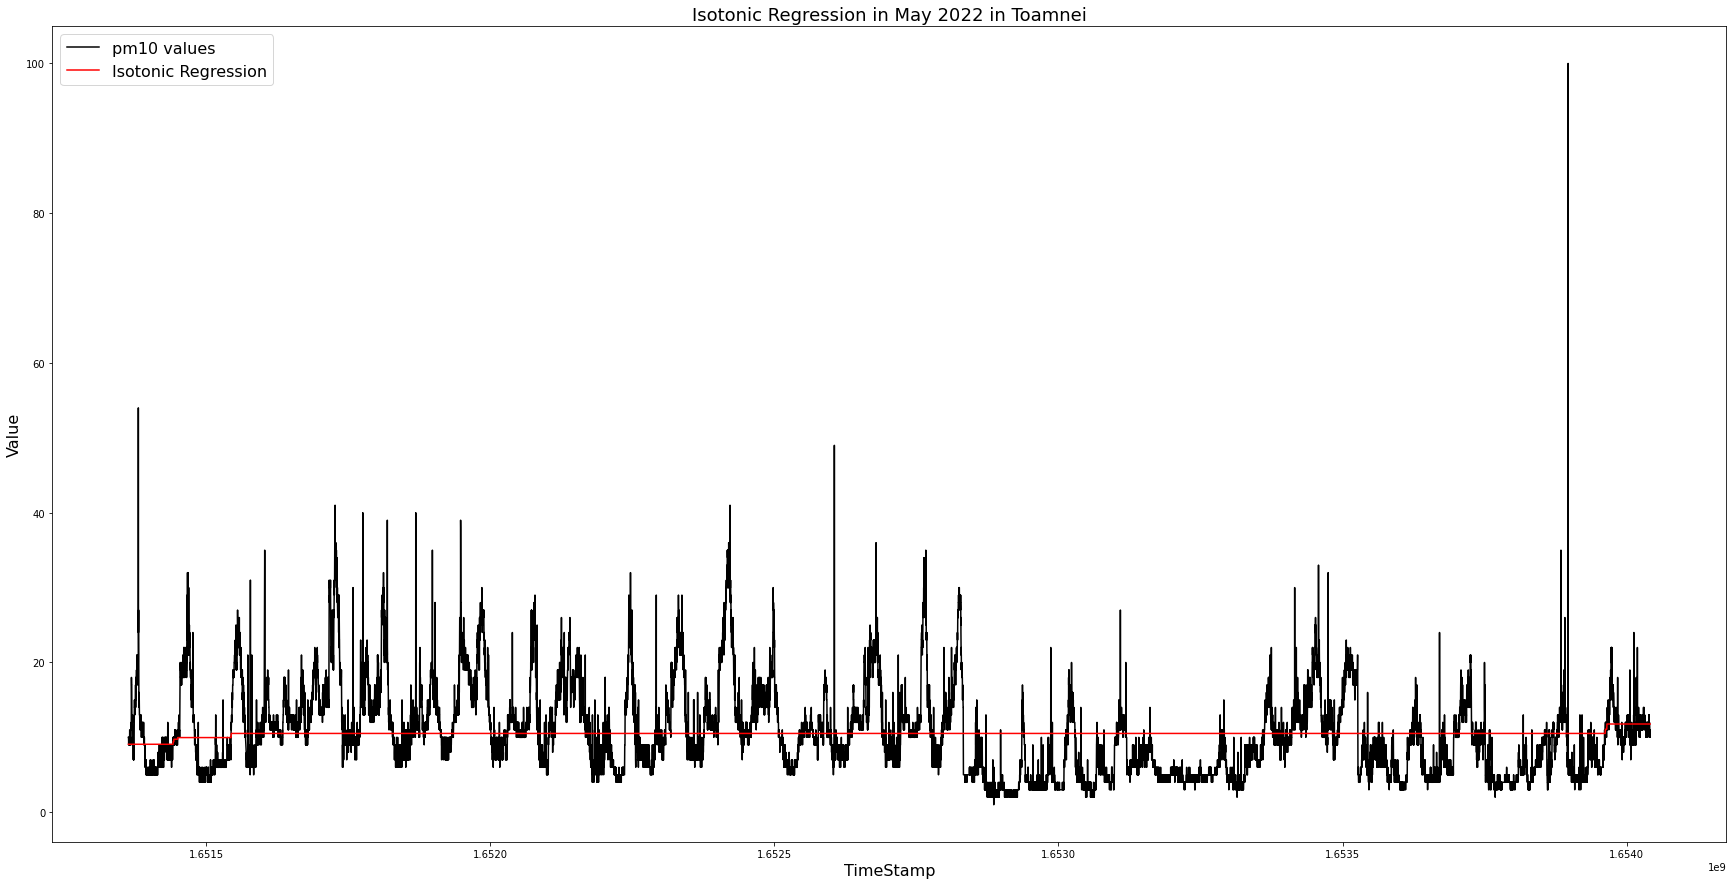

RMSE:  5.75740170015961


In [ ]:
dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")
X = dataframe[["time"]].values
Y = dataframe[["ch2o"]].values
i=0
x=[]
y=[]
for el in X:
    x.append(i)
    y.append(Y[i][0])
    i=i+1


from sklearn.isotonic import IsotonicRegression
clf = IsotonicRegression()
clf.fit(x, y)
y_pred = clf.predict(x)


plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(X, y, color='black', label="ch2o values")
plt.plot(X, y_pred, color='red', label='Isotonic Regression')
plt.title('Isotonic Regression in May 2022 in Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('simulations/CSV_ch2o_2022-05_Isotonic.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE: ", rmse)

In [ ]:
# dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")
# X = dataframe[["time"]].values
# Y = dataframe[["ch2o"]].values
# i=0
# x=[]
# y=[]
# for el in X:
#     x.append(i)
#     y.append(Y[i][0])
#     i=i+1


# from sklearn.ensemble import RandomForestRegressor
# clf = RandomForestRegressor(bootstrap=True, max_depth=55, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=600)
# clf.fit(x, y)
# y_pred = clf.predict(x)


# plt.close("all")
# plt.figure(figsize=(30,15))
# plt.plot(X, y, color='black', label="ch2o values")
# plt.plot(X, y_pred, color='red', label='Random Forest Regression')
# plt.title('Random Forest Regression in May 2022 in Toamnei', fontsize=18)
# plt.xlabel('TimeStamp', fontsize=16)
# plt.ylabel('Value', fontsize=16)
# plt.legend(fontsize=16)
# plt.savefig('simulations/CSV_ch2o_2022-05_RandomForest.jpg', bbox_inches = 'tight')
# plt.show()


# import numpy as np
# from sklearn.metrics import mean_squared_error
# rmse = np.sqrt(mean_squared_error(y, y_pred))
# print("RMSE: ", rmse)

In [ ]:
# dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")
# X = dataframe[["time"]].values
# Y = dataframe[["ch2o"]].values
# i=0
# x=[]
# y=[]
# for el in X:
#     x.append(i)
#     y.append(Y[i][0])
#     i=i+1


# from sklearn.linear_model import LinearRegression
# clf = LinearRegression()
# clf.fit(x, y)
# y_pred = clf.predict(x)


# plt.close("all")
# plt.figure(figsize=(30,15))
# plt.plot(X, y, color='black', label="ch2o values")
# plt.plot(X, y_pred, color='red', label='Random Forest Regression')
# plt.title('Random Forest Regression in May 2022 in Toamnei', fontsize=18)
# plt.xlabel('TimeStamp', fontsize=16)
# plt.ylabel('Value', fontsize=16)
# plt.legend(fontsize=16)
# plt.savefig('simulations/CSV_ch2o_2022-05_RandomForest.jpg', bbox_inches = 'tight')
# plt.show()


# import numpy as np
# from sklearn.metrics import mean_squared_error
# rmse = np.sqrt(mean_squared_error(y, y_pred))
# print("RMSE: ", rmse)

In [ ]:
# dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")
# X = dataframe.select_dtypes(include="number").drop("ch2o", axis=1)
# y = dataframe.ch2o
# X_test = dataframe.select_dtypes(include="number")


# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="mean")
# X = imputer.fit_transform(X)
# X_test = imputer.fit_transform(X_test)


# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
# forest = RandomForestRegressor()
# _ = forest.fit(X_train, y_train)
# print(f"R2 for training set: {forest.score(X_train, y_train)}")
# print(f"R2 for validation set: {forest.score(X_valid, y_valid)}\n")
# print(forest.get_params())


# n_estimators = np.arange(100, 2000, step=100)
# max_features = ["auto", "sqrt", "log2"]
# max_depth = list(np.arange(10, 100, step=10)) + [None]
# min_samples_split = np.arange(2, 10, step=2)
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# param_grid = {
#     "n_estimators": n_estimators,
#     "max_features": max_features,
#     "max_depth": max_depth,
#     "min_samples_split": min_samples_split,
#     "min_samples_leaf": min_samples_leaf,
#     "bootstrap": bootstrap,
# }
# print(param_grid)


# from sklearn.model_selection import RandomizedSearchCV
# forest = RandomForestRegressor()
# random_cv = RandomizedSearchCV(
#     forest, param_grid, n_iter=100, cv=3, scoring="r2", n_jobs=-1
# )


# _ = random_cv.fit(X, y)
# print("Best params:\n")
# print(random_cv.best_params_)
# print(random_cv.best_score_)

R2 for training set: 0.9993445699656824
R2 for validation set: 0.9974811520865037

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_split': array([2, 4, 6, 8]), 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


KeyboardInterrupt: 

In [ ]:
# n_iterations = 1
# for value in param_grid.values():
#     n_iterations *= len(value)
    
# new_params = {
#     "n_estimators": [1100, 1200, 1300],
#     "max_features": ['sqrt'],
#     "max_depth": [8, 10, 12],
#     "min_samples_split": [6, 8, 10],
#     "min_samples_leaf": [1, 2, 3],
#     "bootstrap": [False],
# }

# n_iterations = 1
# for value in new_params.values():
#     n_iterations *= len(value)

# from sklearn.model_selection import GridSearchCV
# forest = RandomForestRegressor()
# grid_cv = GridSearchCV(forest, new_params, n_jobs=-1)

# _ = grid_cv.fit(X, y)
# print('Best params:\n')
# print(grid_cv.best_params_, '\n')
# print(grid_cv.best_score_)

Best params:

{'bootstrap': False, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 1300} 

0.7198481567854726
